In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from scipy import stats 

In [6]:
ddf = pd.read_csv('here.csv')

In [7]:
df = pd.read_excel('stats.xlsx',header=0)
df.to_csv('here.csv')
print(df.head())
df[['Количество больничных дней', 'Возраст', 'Пол']] = pd.DataFrame(df['Количество больничных дней,Возраст,Пол'].str.split(',').tolist())
df = df[['Количество больничных дней', 'Возраст', 'Пол']]
df.head()

  Количество больничных дней,Возраст,Пол
0                               5,39,"Ж"
1                               4,54,"М"
2                               4,26,"М"
3                               5,42,"М"
4                               4,29,"М"


,Количество больничных дней,Возраст,Пол
0,5,39,"""Ж"""
1,4,54,"""М"""
2,4,26,"""М"""
3,5,42,"""М"""
4,4,29,"""М"""


In [8]:
dict_encoder = {'"М"':0, '"Ж"':1}
df['Пол'] = df['Пол'].map(dict_encoder)
df.head()

,Количество больничных дней,Возраст,Пол
0,5,39,1
1,4,54,0
2,4,26,0
3,5,42,0
4,4,29,0


In [25]:
df.describe()

,Количество больничных дней,Возраст,Пол
count,237.000000,237.000000,237.000000
mean,3.257384,40.181435,0.413502
std,1.807821,6.875157,0.493504
min,0.000000,23.000000,0.000000
25%,2.000000,36.000000,0.000000
50%,3.000000,41.000000,0.000000
75%,4.000000,45.000000,1.000000
max,8.000000,60.000000,1.000000


<AxesSubplot: >

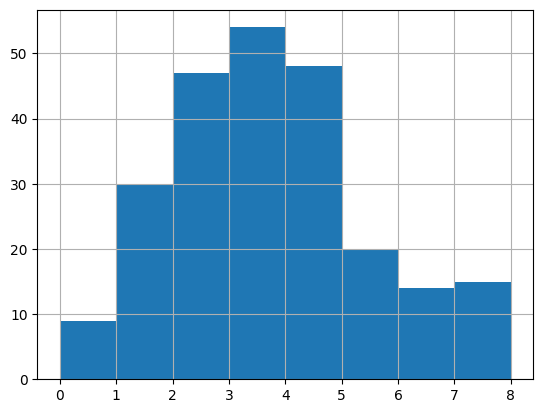

In [30]:
df['Количество больничных дней'].hist(bins=8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    object
 1   Возраст                     237 non-null    object
 2   Пол                         237 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.7+ KB


In [34]:
female_sample = df[(df['Количество больничных дней']>7) & (df['Пол']==1)]['Количество больничных дней']
np.var(female_sample)

0.0

In [10]:
df['Количество больничных дней'] = df['Количество больничных дней'].astype(int)
df['Возраст'] = df['Возраст'].astype(int)

In [11]:
import numpy as np

In [12]:
m_male=df[(df['Количество больничных дней']>2) & (df['Пол']==0)]['Количество больничных дней'].mean()
n_male = len(df[(df['Количество больничных дней']>2) & (df['Пол']==0)]['Количество больничных дней'])
n_female = len(df[(df['Количество больничных дней']>2) & (df['Пол']==1)]['Количество больничных дней'])
m_female=df[(df['Количество больничных дней']>2) & (df['Пол']==1)]['Количество больничных дней'].mean()
m_male, m_female

(4.333333333333333, 4.2388059701492535)

In [13]:
std_male = df[(df['Количество больничных дней']>2) & (df['Пол']==0)]['Количество больничных дней'].std()
std_female = df[(df['Количество больничных дней']>2) & (df['Пол']==1)]['Количество больничных дней'].std()
stdd = 0
for i in df[(df['Количество больничных дней']>2) & (df['Пол']==0)]['Количество больничных дней']:
    stdd+= (i - m_male)**2
stdd /= len(df[(df['Количество больничных дней']>2) & (df['Пол']==0)]['Количество больничных дней'])-1
stdd = np.sqrt(stdd)
print(std_male, std_female)

1.4753666755451804 1.2683746726684697


In [35]:
male_sample = df[(df['Количество больничных дней']>2) & (df['Пол']==0)]['Количество больничных дней']
female_sample = df[(df['Количество больничных дней']>2) & (df['Пол']==1)]['Количество больничных дней']
n_male, n_female = len(male_sample), len(female_sample)
mean_male, mean_female = np.mean(male_sample), np.mean(female_sample)
var_male, var_female= np.var(male_sample, ddof=1), np.var(female_sample, ddof=1)
# pooled sample variance
var = ( ((n_male-1)*var_male) + ((n_female-1)*var_female) ) / (n_male+n_female-2)
# standard error
std_error = np.sqrt(var * (1.0 / n_male + 1.0 / n_female))
 
print("sample_1 mean:",np.round(mean_male,4))
print("sample_2 mean:",np.round(mean_female,4))
print("variance of sample_1:",np.round(var_male,4))
print("variance of sample_2:",np.round(var_female,4))
print("pooled sample variance:",var)
print("standard error:",std_error)

sample_1 mean: 4.3333
sample_2 mean: 4.2388
variance of sample_1: 2.1767
variance of sample_2: 1.6088
pooled sample variance: 1.9251394036528766
standard error: 0.22727021399444403


In [23]:
# calculate t statistics
t = abs(mean_male - mean_female) / std_error
print('t static:',t)
# two-tailed critical value at alpha = 0.05
dof = n_female+n_male-2
t_c = stats.t.ppf(q=0.975, df=dof)
print("Critical value for t two tailed:",t_c)

# one-tailed critical value at alpha = 0.05
t_c = stats.t.ppf(q=0.95, df=dof)
print("Critical value for t one tailed:",t_c)
 
# get two-tailed p value
p_two = 2*(1-stats.t.cdf(x=t, df=dof))
print("p-value for two tailed:",p_two)
 
# get one-tailed p value
p_one = 1-stats.t.cdf(x=t, df=dof)
print("p-value for one tailed:",p_one)

t static: 0.41592499748510986
Critical value for t two tailed: 1.976013177679155
Critical value for t one tailed: 1.6551445337952997
p-value for two tailed: 0.67806332103283
p-value for one tailed: 0.339031660516415


In [37]:
fem = df[df['Пол']==1]['Количество больничных дней']
fem.value_counts().sort_index()

0     1
1    14
2    16
3    23
4    23
5     8
6     9
7     3
8     1
Name: Количество больничных дней, dtype: int64

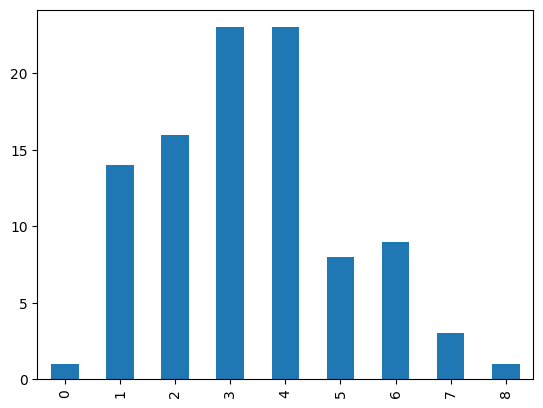

In [43]:
fem = df[df['Пол']==1]['Количество больничных дней']
fem_hist = fem.value_counts().sort_index()
fem_hist.columns = ['a', 'b']
fem_hist.plot(kind='bar')
fem_hist